# Intro to ![Astropy: A Community Python Library for Astronomy](http://www.astropy.org/images/astropy_banner_96.png)

### AIM - To introduce students to astropy and FITS images

This Notebook explores the astronomy package for python. By the end of this Notebook you will be able to convert between units, query astronomical databases, and create your own color images of astronomical objects.

## Start:

*Shift+Enter* on a code snippet to run the code. Most of the time you'll have to run the snippets in order or you'll get an error.

If you're stuck you can consult the docs at https://docs.python.org/3/, and https://numpy.org/doc/stable/.  
You can also get advice from www.stackoverflow.com.

**Comments** - All code should be commented for readability

***


In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Astropy

Astropy is a core Python package for astronomy. It is formed from the merger of a number of other Python astronomy packages, but also contains a lot of original code. Core features include:

* `astropy.constants`, `astropy.units`: Physical constants, units, and unit conversion
* `astropy.time`: Manipulation of dates and times
* `astropy.coordinates`: Representation of and conversion between astronomical coordinate systems
* `astropy.table`: Tables and gridded data
* `astropy.io.fits`: Manipulating FITS files
* `astropy.io.ascii`: Manipulating ASCII tables of many different formats
* `astropy.io.votable`: Virtual Observatory tables
* `astropy.wcs`: World Coordinate System transformations
* `astropy.cosmology`: Cosmological calculations
* `astropy.stats`: Astrostatistics
* `astropy.modeling`: multi-D model fitting Swiss army knife

The Astropy project also has several ["affiliated packages"](http://www.astropy.org/affiliated/index.html) that have similar design but are maintained separately, including:

* [APLPy](http://aplpy.github.io): High-level astronomical map making with Matplotlib
* [WCSAxes](http://wcsaxes.readthedocs.org/): Nuts-and-bolts astronomical mapmaking for Matplotlib experts
* [Photutils](http://photutils.readthedocs.org/en/latest/): Aperture photometry
* [Astroquery](http://astroquery.readthedocs.org/en/latest/): Query astronomical databases

Let's experiment by opening up a P48 image. We'll need several modules from the Astropy package for this exercise.

In [2]:
import astropy.coordinates as coords
import astropy.units as u
import astropy.io.fits
import astropy.stats
import astropy.table
import astropy.wcs

We just have time to scratch the surface of what astropy is capable of.  `astropy.constants` and `astropy.units` are both quite useful:

In [3]:
import astropy.constants as const
import astropy.units as u

const.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

Unit conversion is as simple as adding `.to(unit)`:

In [4]:
const.c.to('AU/year')

<Quantity 63241.07708427 AU / yr>

### Task 1

Use `astropy.constants` to calculate the mean density of Earth in g/cm^3.

# FITS files

FITS ("Flexible Image Transport System") has been the standard for astronomical data since 1981. It's age shows a bit, but it's important to have an archival standard. FITS files can be both images or tables of data. For our purposes we'll only be dealing with image files.

Let's work with an example FITS image. The following line downloads an example FITS file to use.

In [10]:
from astropy.utils.data import download_file
from astropy.io import fits
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

Let's open the FITS file and find out what it contains.

In [11]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/96/n01063296/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Generally the image information is located in the `PRIMARY` block. The blocks are numbered and can be accessed by indexing `hdu_list`.

In [12]:
image_data = hdu_list[0].data

You data is now stored as a 2-D numpy array. Want to know the dimensions of the image? Just look at the shape of the array.

In [13]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


## Viewing the image data and getting basic statistics

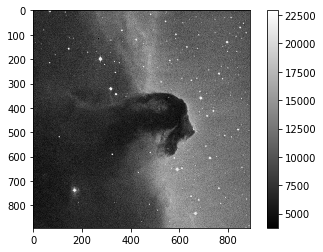

In [15]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

Let's get some basic statistics about our image

In [17]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


##Plotting a histogram

To make a histogram with `matplotlib.pyplot.hist()`, I need to cast the data from a 2-D to array to something one dimensional.

In this case, I am using the `ndarray.flatten()` to return a 1-D numpy array, and make a histogram

<class 'numpy.ndarray'>


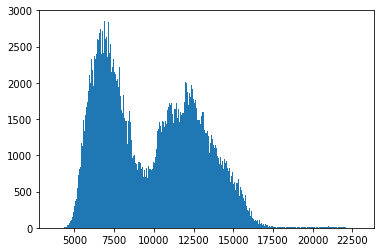

In [18]:
print(type(image_data.flatten()))
NBINS = 1000
histogram = plt.hist(image_data.flatten(), NBINS)

## Image Headers

Recognize this image yet? If not all the metadata about this image is stored in the "header" which we can view. 

In [29]:
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

There's a lot of information in there! The header contains many keywords which encode important astronomical information about the image. For example, it is two dimensions, 891 by 893 pixels, and was created in 2014 but comes from data observed in 1990.

The size and location of each pixel is defined by the "World Coordinate System" (WCS) described in the header by the following keywords:

`
RADESYS = 'ICRS              ' /GetImage: GSC-II calibration using ICRS system  
CTYPE1  = 'RA---TAN          ' /GetImage: RA-Gnomic projection                  
CRPIX1  =           446.000000 /GetImage: X reference pixel                     
CRVAL1  =            85.274970 /GetImage: RA of reference pixel                 
CUNIT1  = 'deg               ' /GetImage: degrees                               
CTYPE2  = 'DEC--TAN          ' /GetImage: Dec-Gnomic projection                 
CRPIX2  =           447.000000 /GetImage: Y reference pixel                     
CRVAL2  =            -2.458265 /GetImage: Dec of reference pixel                
CUNIT2  = 'deg               ' /Getimage: degrees                               
`

Don't pay much mind to the tangent projection. Over these small distances it doesn't matter much which projection of the sky you use. (Though if map projections is your thing, see [here](https://xkcd.com/977/).)

We aren't going to do much with this right now, but it's useful to know where all that information is. For example, if you aren't sure what the size of an image is, you can query the header keyword, as such:

In [30]:
hdu_list[0].header['NAXIS'] # 2 means that it's 2-dimension

2

## Basic image math: image stacking

You can perform math with the image data like any other numpy array. In this particular example, I will stack several images of M13 taken with a ~10'' telescope.

I open a series of FITS files and store the data in a list, which I've named image_concat.

In [32]:
image_list = [ download_file('http://data.astropy.org/tutorials/FITS-images/M13_blue_000'+n+'.fits', cache=True ) \
              for n in ['1','2','3','4','5'] ]

# The long way
image_concat = []
for image in image_list:
    image_concat.append(fits.getdata(image))
    
# The short way
#image_concat = [ fits.getdata(image) for image in IMAGE_LIST ]

Now stack the images by summing the concatenated list.

In [33]:
# The long way
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image

# The short way
#final_image = np.sum(image_concat, axis=0)

Now let's take a look at the image...

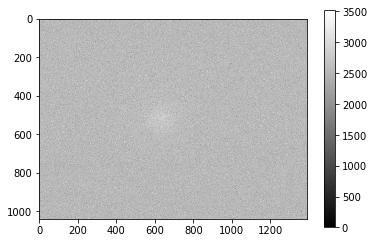

In [38]:
plt.imshow(final_image, cmap='gray')
plt.colorbar()

Can you see it? Me neither. This is because the color scale of our image needs to be refined. This is often called the "stretch". Let's take a look at a histogram of the data.

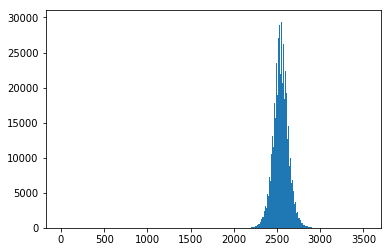

In [35]:
image_hist = plt.hist(final_image.flatten(), 1000)

Using the keywords vmin and vmax to set limits on the color scaling for imshow.

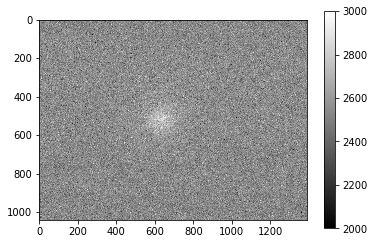

In [40]:
plt.imshow(final_image, cmap='gray', vmin=2.e3, vmax=3.e3)
plt.colorbar()

## Writing image data to a FITS file

This is easy to do with the writeto() method.

You will receive an error if the file you are trying to write already exists. That's why I've set `overwrite=True`. Be careful though as this makes it easy to accidentally overwrite an image you wanted to keep!

In [42]:
outfile = 'stacked_M13_blue.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

### Task 2

Determine the mean, median, and standard deviation of a part of the stacked M13 image where there is not light from M13. Use those statistics with a sum over the part of the image that includes M13 to estimate the total light in this image from M13.

### Task 3

Show the image of the Horsehead Nebula, but in units of surface brightness (magnitudes per square arcsecond). (Hint: the physical size of the image is 15x15 arcminutes.)

### Task 4
Now write out the image you just created, preserving the header the original image had, but add a keyword 'UNITS' with the value 'mag per sq arcsec'. (Hint: you may need to read the [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/index.html) documentation if you're not sure how to include both the header and the data)